In [1]:
import os
import requests
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime, timedelta

In [2]:
# 영화 데이터 api 요청
def movie_data_search(yyyymmdd):
  date = yyyymmdd
  movie_key = ''
  
  if (int(date) < 20200101):
    movie_key = '5581fe846aeef5433ae740f641378a60'
  else:
    movie_key = 'f3b5e5d9bbe8e9449a85e0326b711433'

  movie_url = 'http://www.kobis.or.kr/kobisopenapi/webservice/rest/boxoffice/searchDailyBoxOfficeList.xml?targetDt='+ date +'&weekGb=0&key='

  movie_request_api = movie_url + movie_key
  movie_res = requests.get(movie_request_api)
  movie_soup = BeautifulSoup(movie_res.content, 'xml')

  # 해당 일 관객수
  movie_audiCnt = movie_soup.find_all('audiCnt')
  # 해당 일 누적 매출량
  movie_salesAmt = movie_soup.find_all('salesAmt')

  data = []
  audiCnt_sum = 0
  salesAmt_sum = 0

  # 한 번에 출력되는 row의 갯수: 10
  for i in range(10):
    audiCnt_sum += int(movie_audiCnt[i].get_text())
    salesAmt_sum += int(movie_salesAmt[i].get_text())

  data.append(audiCnt_sum)
  data.append(salesAmt_sum)

  return data

In [3]:
def movie_data_price(yymmdd):
  date = yymmdd # 20190101
  sum_data = {}
  if os.path.exists('movie_data.csv'):
    os.remove('movie_data.csv')

  for ymd in date: # 2019 2020
    date_list = []
    year = []
    mon = []
    day = []
    audiCnt_sum_list = []
    salesAmt_sum_list = []

    base = datetime.strptime(ymd, '%Y%m%d')

    # 181일 간의 데이터
    date_list = [(base + timedelta(days=x)).strftime('%Y%m%d') for x in range(0, 181)] 

    for i in date_list:
      data_list = movie_data_search(i)
      audiCnt_sum_list.append(data_list[0])
      salesAmt_sum_list.append(data_list[1])
      year.append(i[0:4])
      mon.append(i[4:6])
      day.append(i[6:8])

    sum_data = {
        '년': year, 
        '월': mon,
        '일': day,
        '일별누적관객수(명)': audiCnt_sum_list, 
        '일별누적매출(원)': salesAmt_sum_list 
    }

    df = pd.DataFrame(sum_data)

    if not os.path.exists('movie_data.csv'):
      df.to_csv('movie_data.csv', index = False, mode = 'w', encoding = 'utf-8-sig')
    else:
      df.to_csv('movie_data.csv', index = False, mode = 'a', encoding = 'utf-8-sig', header = False)

In [4]:
ymd_movie = ['20190101', '20200101']

movie_data = movie_data_price(ymd_movie)

      년   월   일  일별누적관객수(명)   일별누적매출(원)
0  2019  01  01     1123339  9982920400
      년   월   일  일별누적관객수(명)    일별누적매출(원)
0  2020  01  01     1309913  11573769570


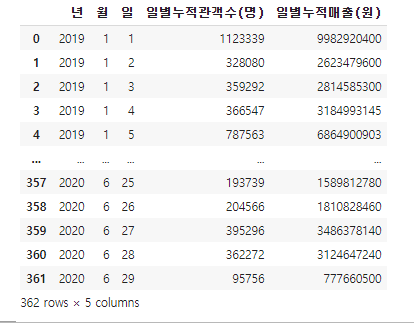

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt  # 그래프 그리는 용도
%matplotlib inline  

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
drive.mount('/content/gdrive/')

In [ ]:
movie_data_url = '/content/gdrive/MyDrive/Colab Notebooks/data/movie_data.csv'
movie_elections = pd.read_csv(movie_data_url)

In [ ]:
# 월별 총 관객수와 총 누적 매출
movie_2019 = movie_elections[movie_elections['년'] == 2019]
movie_2020 = movie_elections[movie_elections['년'] == 2020]


movie_local_2019 = []
movie_local_2020 = []
movie_column = []
miv_sum_2019 = []
miv_sum_2020 = []

for idx, i in enumerate(movie_2020):
  movie_column.append(i) if idx > 2 else 0

for i in range(2):
    for column in movie_column:
      miv_sum_2019.append(movie_2019[column].sum()) if i == 0 else miv_sum_2020.append(movie_2020[column].sum())

[105596480, 902226112765] [30036941, 256222613518]


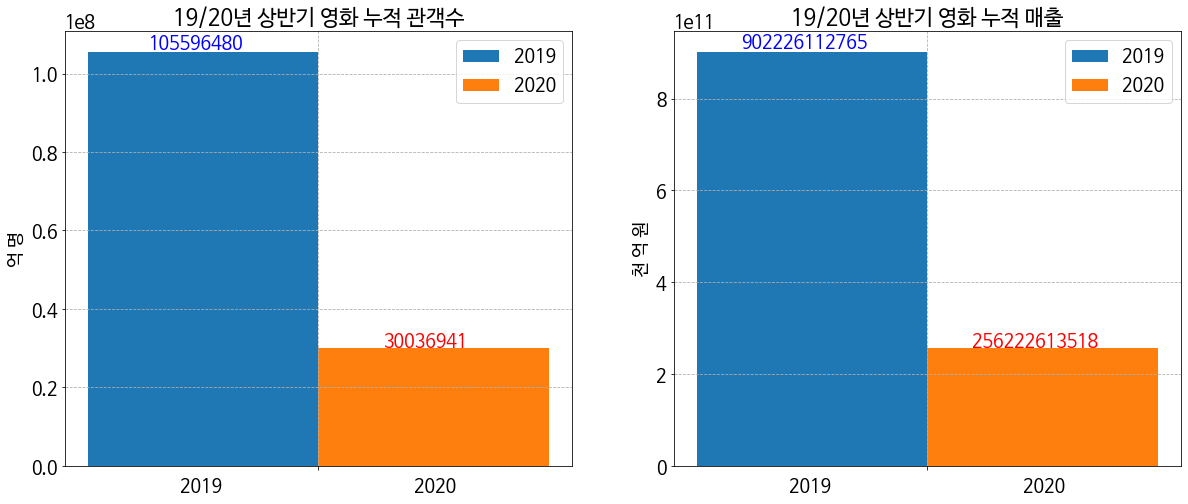

In [ ]:
plt.rc('font', family='NanumBarunGothic')
plt.rcParams["figure.figsize"] = (20,8) 
plt.rcParams.update({'font.size': 18})

ax = plt.subplot(121)
ax2 = plt.subplot(122)

ax.set_title('19/20년 상반기 영화 누적 관객수')
ax2.set_title('19/20년 상반기 영화 누적 매출')

def create_x(t, w, n, d):
    return [t*x + w*n for x in range(d)]

ax.set_xticklabels('')
ax2.set_xticklabels('')

value_a_x = create_x(2, 0.8, 1, 1)
value_b_x = create_x(2, 0.8, 2, 1)

value_a_x2 = create_x(2, 0.8, 1, 1)
value_b_x2 = create_x(2, 0.8, 2, 1)

middle_x1 = [(a+b)/2 for (a,b) in zip(value_a_x, value_b_x)]
middle_x2 = [(a+b)/2 for (a,b) in zip(value_a_x2, value_b_x2)]

ax.bar(value_a_x, miv_sum_2019[0]) 
ax.bar(value_b_x, miv_sum_2020[0])
ax2.bar(value_a_x2, miv_sum_2019[1]) 
ax2.bar(value_b_x2, miv_sum_2020[1])

for i, p in enumerate(ax.patches):
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate(int(height), (left+width - 0.85/2, height * 1.007), ha='center', fontSize = 18, color = 'blue' if i == 0 else 'red')
for i, p in enumerate(ax2.patches):
    left, bottom, width, height = p.get_bbox().bounds
    ax2.annotate(int(height), (left+width - 0.85/2, height * 1.01), ha='center', fontSize = 18, color = 'blue' if i == 0 else 'red')

ax.set_xlabel('2019                                                2020')
ax.set_ylabel('억 명')
ax.legend([2019, 2020])
ax.set_xticks(middle_x1)
ax.grid(True, linestyle ='--')

ax2.set_xlabel('2019                                                2020')
ax2.set_ylabel('천 억 원')
ax2.legend([2019, 2020])
ax2.set_xticks(middle_x2)
ax2.grid(True, linestyle ='--')

plt.show()

In [ ]:
movie_2019_sales = []
movie_2020_sales = []

for i in movie_2019['월'].unique():
  movie_2019_sales.append(movie_2019[movie_2019['월'] == int(i)]['일별누적매출(원)'].sum())
  movie_2020_sales.append(movie_2020[movie_2020['월'] == int(i)]['일별누적매출(원)'].sum())

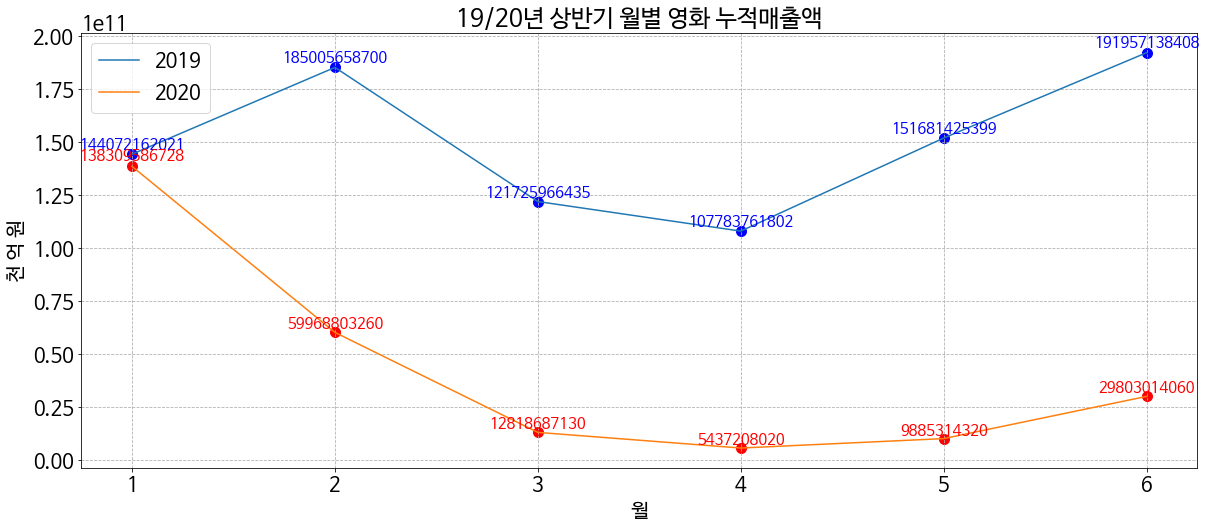

In [ ]:
plt.rc('font', family='NanumBarunGothic')  
plt.rcParams["figure.figsize"] = (20,8) 
plt.rcParams.update({'font.size': 20})

plt.title('19/20년 상반기 월별 영화 누적매출액')

mon = movie_2019['월'].unique()

plt.plot(mon, movie_2019_sales)
plt.scatter(mon, movie_2019_sales, c = 'b', s = 100)
plt.plot(mon, movie_2020_sales)
plt.scatter(mon, movie_2020_sales, c = 'r', s = 100)

for i, v in enumerate(movie_2019_sales):
  plt.text(mon[i], v * 1.005, v, fontSize = 15, color = 'blue', horizontalalignment = 'center', verticalalignment = 'bottom')
for i, v in enumerate(movie_2020_sales):
  plt.text(mon[i], v* 1.008, v, fontSize = 15, color = 'red', horizontalalignment = 'center', verticalalignment = 'bottom')

plt.xlabel('월')
plt.ylabel('천 억 원')
plt.legend([2019, 2020])
plt.grid(True, linestyle ='--')

plt.show()